# Part 1

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import convolve2d
from skimage import measure

In [ ]:
in1 = np.array([
    [0, 0, 0, 0],
    [1, 1, 1, 1],
    [1, 0, 0, 1],
    [1, 1, 1, 1]
])

in2 = np.array([
    [1, 1, 1, 0],
    [1, 0, 1, 0],
    [1, 1, 1, 0],
    [0, 0, 0, 1]
])

in3 = np.array([
    [0, 0, 0, 0],
    [0, 1, 1, 1],
    [0, 0, 1, 0],
    [0, 0, 0, 0]
])

in4 = np.array([
    [0, 0, 0, 1],
    [0, 1, 0, 0],
    [1, 1, 1, 1],
    [0, 1, 0, 0]
])

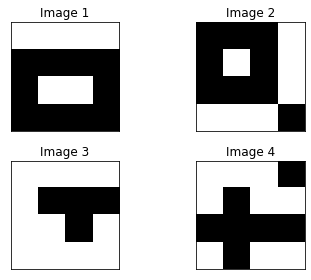

In [ ]:
plt.subplot(2, 2, 1)
plt.imshow(in1, cmap=plt.cm.binary)
plt.title('Image 1'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2)
plt.imshow(in2, cmap=plt.cm.binary)
plt.title('Image 2'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3)
plt.imshow(in3, cmap=plt.cm.binary)
plt.title('Image 3'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4)
plt.imshow(in4, cmap=plt.cm.binary)
plt.title('Image 4'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

In [ ]:
filter1 = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
])

filter2 = np.array([
    [1, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])

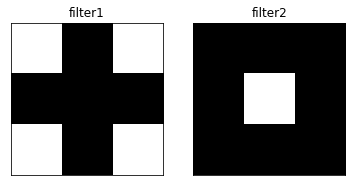

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(filter1, cmap=plt.cm.binary)
plt.xticks([]), plt.yticks([])
plt.title('filter1')
plt.subplot(1, 2, 2)
plt.imshow(filter2, cmap=plt.cm.binary)
plt.xticks([]), plt.yticks([])
plt.title('filter2')
plt.show()

In [ ]:
def conv(img, filter, bias=-2):
    res = convolve2d(img, filter, mode='valid')+bias
    print("Result of conv2d is:", res, sep='\n')    # Convolution
    res = np.maximum(0, res)                        # ReLU
    res = measure.block_reduce(res, (2, 2), np.max) # Max Pooling
    return res

In [ ]:
ff, im = 1, 1
for f in [filter1, filter2]:
    for img in [in1, in2, in3, in4]:
        print('in'+str(im)+' * filter'+str(ff))
        res = conv(img, f)
        print('Final result is:', res)
        print('------------------------------')
        im += 1
    im = 1
    ff += 1

in1 * filter1
Result of conv2d is:
[[1 1]
 [1 1]]
Final result is: [[1]]
------------------------------
in2 * filter1
Result of conv2d is:
[[2 1]
 [1 1]]
Final result is: [[2]]
------------------------------
in3 * filter1
Result of conv2d is:
[[0 2]
 [0 0]]
Final result is: [[2]]
------------------------------
in4 * filter1
Result of conv2d is:
[[0 0]
 [3 1]]
Final result is: [[3]]
------------------------------
in1 * filter2
Result of conv2d is:
[[1 1]
 [5 5]]
Final result is: [[5]]
------------------------------
in2 * filter2
Result of conv2d is:
[[6 2]
 [2 1]]
Final result is: [[6]]
------------------------------
in3 * filter2
Result of conv2d is:
[[0 1]
 [1 1]]
Final result is: [[1]]
------------------------------
in4 * filter2
Result of conv2d is:
[[1 3]
 [2 2]]
Final result is: [[3]]
------------------------------


## Filter 1:

In [ ]:
conv(in1, filter1)

Result of conv2d is:
[[1 1]
 [1 1]]


array([[1]])

In [ ]:
conv(in2, filter1)

Result of conv2d is:
[[2 1]
 [1 1]]


array([[2]])

In [ ]:
conv(in3, filter1)

Result of conv2d is:
[[0 2]
 [0 0]]


array([[2]])

In [ ]:
conv(in4, filter1)

Result of conv2d is:
[[0 0]
 [3 1]]


array([[3]])

* in4 has the max score

## Filter 2:

In [ ]:
conv(in1, filter2)

Result of conv2d is:
[[1 1]
 [5 5]]


array([[5]])

In [ ]:
conv(in2, filter2)

Result of conv2d is:
[[6 2]
 [2 1]]


array([[6]])

In [ ]:
conv(in3, filter2)

Result of conv2d is:
[[0 1]
 [1 1]]


array([[1]])

In [ ]:
conv(in4, filter2)

Result of conv2d is:
[[1 3]
 [2 2]]


array([[3]])

* in1, in2 have the max scores

# Part 2

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
import cv2

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [ ]:
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
y_train_onehot = keras.utils.to_categorical(y_train, 10)
y_test_onehot = keras.utils.to_categorical(y_test, 10)

In [ ]:
def show_samples(x_train, y_train):
    np.random.seed(21)
    cnt = 1
    plt.figure(figsize=(10, 10))
    for i in np.random.choice(range(len(x_train)), 25):
        plt.subplot(5, 5, cnt)
        plt.imshow(x_train[i])
        plt.xticks([])
        plt.yticks([])
        plt.title(class_names[y_train[i, 0]])
        cnt += 1
    plt.tight_layout()
    plt.show()

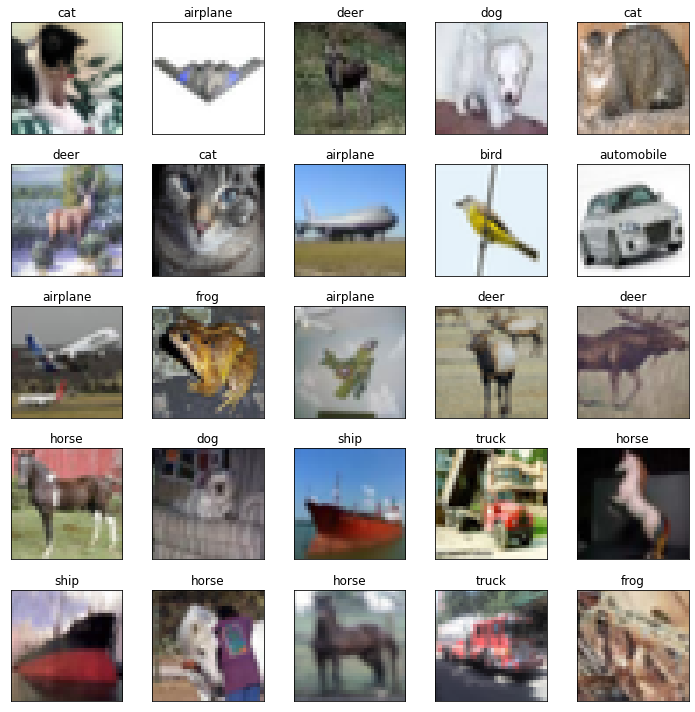

In [ ]:
show_samples(x_train, y_train)

In [ ]:
def resize(train, test, w, h):
    x_train_ = np.zeros((train.shape[0], w, h, 3)).astype(np.uint8)
    x_test_ = np.zeros((test.shape[0], w, h, 3)).astype(np.uint8)
    for i in range(train.shape[0]):
        x_train_[i] = cv2.resize(train[i], (w, h))
    for i in range(test.shape[0]):
        x_test_[i] = cv2.resize(test[i], (w, h))
    return x_train_, x_test_

Resized to 8x8:


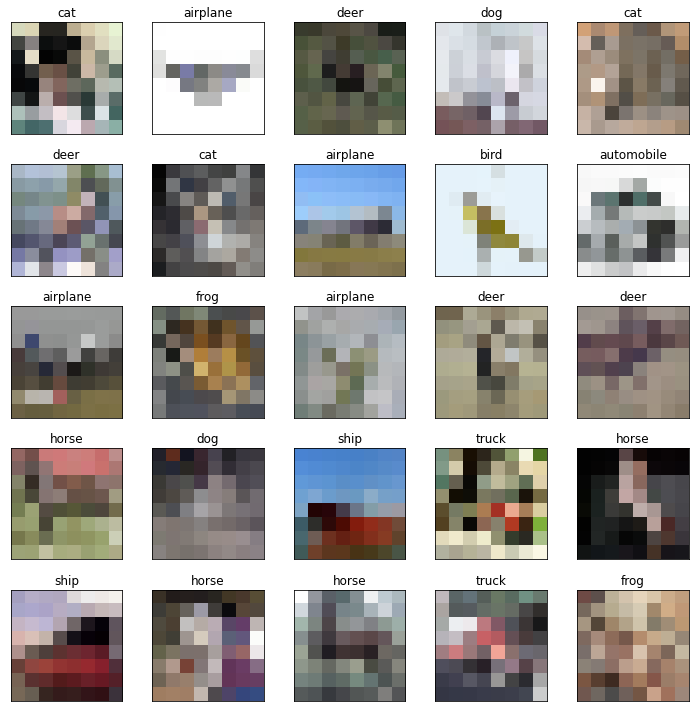

In [ ]:
print('Resized to 8x8:')
x_train_8x8, x_test_8x8 = resize(x_train, x_test, 8, 8)
show_samples(x_train_8x8, y_train)

Resized to 16x16:


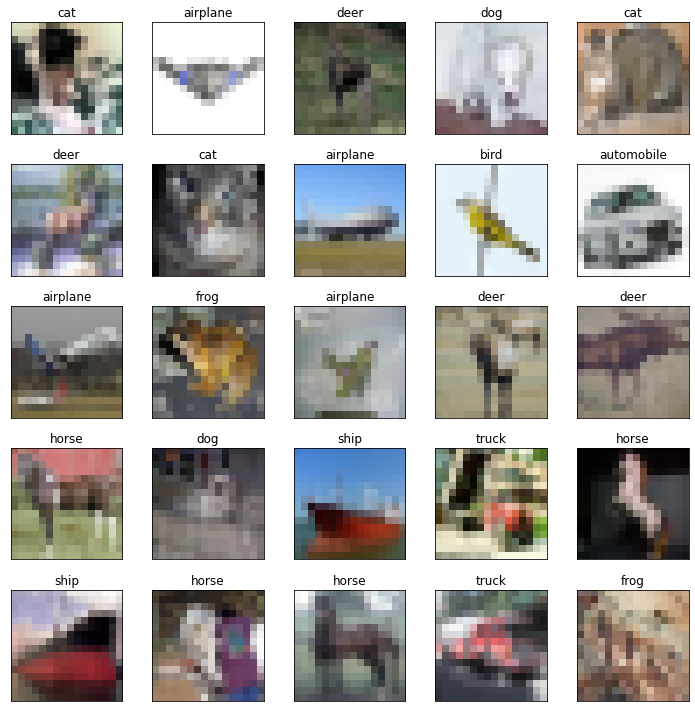

In [ ]:
print('Resized to 16x16:')
x_train_16x16, x_test_16x16 = resize(x_train, x_test, 16, 16)
show_samples(x_train_16x16, y_train)

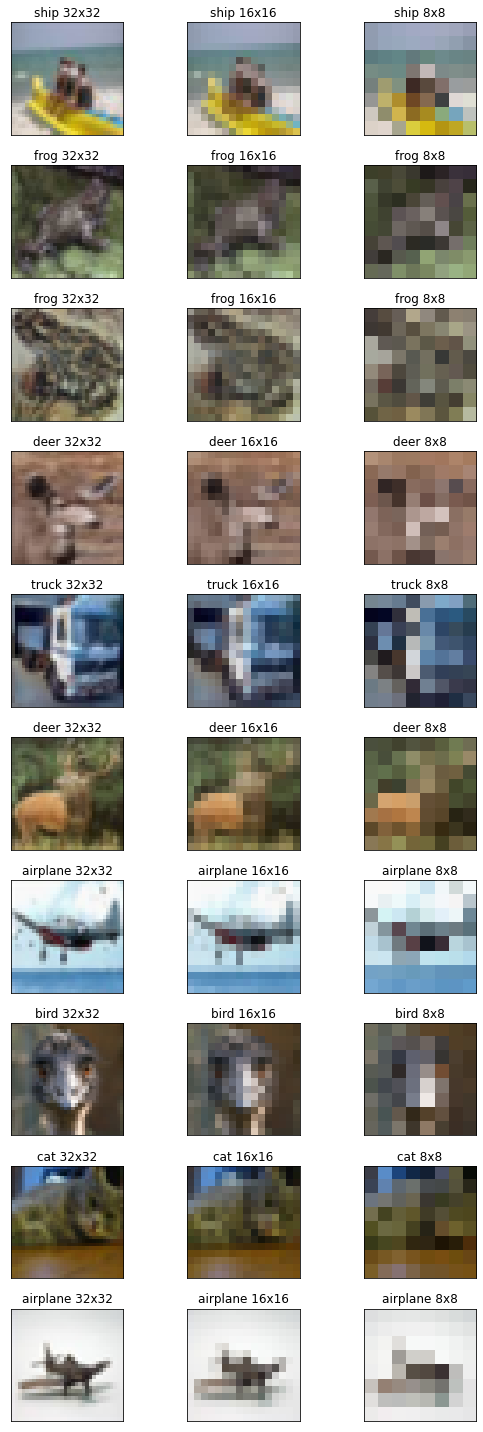

In [ ]:
cnt = 1
np.random.seed(23)
plt.figure(figsize=(8, 20))
for i in np.random.choice(range(len(x_train)), 10):
    plt.subplot(10, 3, cnt)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i, 0]]+' 32x32')
    plt.xticks([]), plt.yticks([])
    plt.subplot(10, 3, cnt+1)
    plt.imshow(x_train_16x16[i])
    plt.xticks([]), plt.yticks([])
    plt.title(class_names[y_train[i, 0]]+' 16x16')
    plt.subplot(10, 3, cnt+2)
    plt.imshow(x_train_8x8[i])
    plt.title(class_names[y_train[i, 0]]+' 8x8')
    plt.xticks([]), plt.yticks([])
    cnt += 3
plt.tight_layout()
plt.show()

## TOTV

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Activation,Input,Flatten
from keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , input_shape = (32, 32, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32 , (3,3)))
model.add(Activation('relu'))
model.add(Conv2D(32 , (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64 , (3,3)))
model.add(Activation('relu'))
model.add(Conv2D(64 , (3,3)))
model.add(Activation('relu'))
model.add(Conv2D(64 , (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('Softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])


In [ ]:
history = model.fit(x_train, y_train_onehot, batch_size = 128 , epochs = 200)


Epoch 1/200
391/391 [==============================] - 8s 13ms/step - loss: 1.9904 - accuracy: 0.2935
Epoch 2/200
391/391 [==============================] - 6s 16ms/step - loss: 1.5242 - accuracy: 0.4435
Epoch 3/200
391/391 [==============================] - 6s 16ms/step - loss: 1.3431 - accuracy: 0.5160
Epoch 4/200
391/391 [==============================] - 5s 14ms/step - loss: 1.2187 - accuracy: 0.5672
Epoch 5/200
391/391 [==============================] - 5s 12ms/step - loss: 1.1310 - accuracy: 0.5983
Epoch 6/200
391/391 [==============================] - 5s 12ms/step - loss: 1.0562 - accuracy: 0.6292
Epoch 7/200
391/391 [==============================] - 5s 12ms/step - loss: 1.0240 - accuracy: 0.6387
Epoch 8/200
391/391 [==============================] - 5s 12ms/step - loss: 0.9803 - accuracy: 0.6560
Epoch 9/200
391/391 [==============================] - 5s 12ms/step - loss: 0.9577 - accuracy: 0.6662
Epoch 10/200
391/391 [==============================] - 5s 12ms/step - loss: 0.923

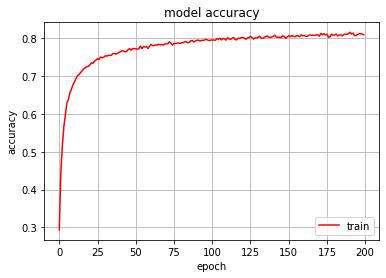

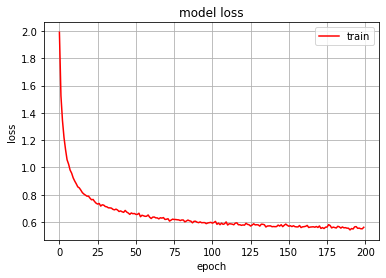

In [ ]:
# Plotting Metrics
# Plot the Accuracy Curves
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.grid()

# Plot the Loss Curves
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.grid()

In [ ]:
y_pred = model.predict(x_test);
y_pred = np.argmax(y_pred, axis=1);

313/313 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.80      0.77      0.78      1000
  automobile       0.93      0.85      0.88      1000
        bird       0.67      0.65      0.66      1000
         cat       0.59      0.60      0.60      1000
        deer       0.70      0.76      0.73      1000
         dog       0.67      0.73      0.70      1000
        frog       0.71      0.86      0.78      1000
       horse       0.84      0.76      0.80      1000
        ship       0.87      0.81      0.84      1000
       truck       0.88      0.81      0.84      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000



In [ ]:
x_train_16to32, x_test_16to32 = resize(x_train_16x16, x_test_16x16, 32, 32)
y_pred_16x16 = model.predict(x_test_16to32);
y_pred_16x16 = np.argmax(y_pred_16x16, axis=1);

print(classification_report(y_test,y_pred_16x16,target_names=class_names))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

    airplane       0.59      0.37      0.46      1000
  automobile       0.95      0.20      0.32      1000
        bird       0.38      0.39      0.39      1000
         cat       0.19      0.74      0.30      1000
        deer       0.38      0.43      0.40      1000
         dog       0.30      0.46      0.36      1000
        frog       0.59      0.10      0.16      1000
       horse       0.91      0.18      0.31      1000
        ship       0.50      0.55      0.52      1000
       truck       0.68      0.12      0.21      1000

    accuracy                           0.35     10000
   macro avg       0.55      0.35      0.34     10000
weighted avg       0.55      0.35      0.34     10000



In [ ]:
x_train_8to32, x_test_8to32 = resize(x_train_8x8, x_test_8x8, 32, 32)
y_pred_8x8 = model.predict(x_test_8to32);
y_pred_8x8 = np.argmax(y_pred_8x8, axis=1);

print(classification_report(y_test,y_pred_8x8,target_names=class_names))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

    airplane       0.33      0.26      0.29      1000
  automobile       0.86      0.01      0.02      1000
        bird       0.21      0.18      0.20      1000
         cat       0.15      0.77      0.26      1000
        deer       0.24      0.28      0.26      1000
         dog       0.25      0.10      0.14      1000
        frog       0.33      0.09      0.14      1000
       horse       1.00      0.01      0.01      1000
        ship       0.30      0.44      0.36      1000
       truck       0.32      0.01      0.02      1000

    accuracy                           0.21     10000
   macro avg       0.40      0.21      0.17     10000
weighted avg       0.40      0.21      0.17     10000



## TVTV

In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , input_shape = (32, 32, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32 , (3,3)))
model.add(Activation('relu'))
model.add(Conv2D(32 , (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64 , (3,3)))
model.add(Activation('relu'))
model.add(Conv2D(64 , (3,3)))
model.add(Activation('relu'))
model.add(Conv2D(64 , (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('Softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train_16to32, y_train_onehot, batch_size = 128 , epochs = 150)

Epoch 1/150
391/391 [==============================] - 6s 13ms/step - loss: 2.0042 - accuracy: 0.2884
Epoch 2/150
391/391 [==============================] - 5s 12ms/step - loss: 1.6044 - accuracy: 0.4124
Epoch 3/150
391/391 [==============================] - 5s 12ms/step - loss: 1.4693 - accuracy: 0.4688
Epoch 4/150
391/391 [==============================] - 5s 12ms/step - loss: 1.3876 - accuracy: 0.4986
Epoch 5/150
391/391 [==============================] - 5s 12ms/step - loss: 1.3333 - accuracy: 0.5231
Epoch 6/150
391/391 [==============================] - 5s 12ms/step - loss: 1.2791 - accuracy: 0.5392
Epoch 7/150
391/391 [==============================] - 5s 12ms/step - loss: 1.2258 - accuracy: 0.5620
Epoch 8/150
391/391 [==============================] - 5s 12ms/step - loss: 1.1931 - accuracy: 0.5756
Epoch 9/150
391/391 [==============================] - 5s 12ms/step - loss: 1.1638 - accuracy: 0.5867
Epoch 10/150
391/391 [==============================] - 5s 12ms/step - loss: 1.137

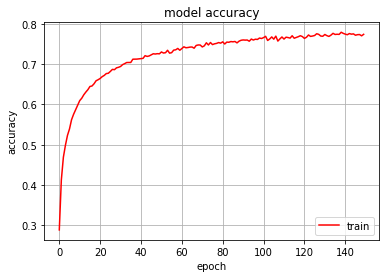

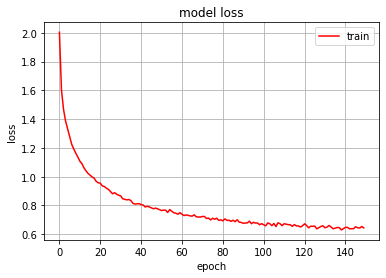

In [ ]:
# Plotting Metrics
# Plot the Accuracy Curves
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.grid()

# Plot the Loss Curves
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.grid()

In [ ]:
y_pred_16x16 = model.predict(x_test_16to32);
y_pred_16x16 = np.argmax(y_pred_16x16, axis=1);

print(classification_report(y_test,y_pred_16x16,target_names=class_names))

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

    airplane       0.79      0.66      0.72      1000
  automobile       0.84      0.78      0.81      1000
        bird       0.68      0.53      0.60      1000
         cat       0.48      0.56      0.52      1000
        deer       0.68      0.60      0.63      1000
         dog       0.56      0.61      0.58      1000
        frog       0.70      0.80      0.75      1000
       horse       0.77      0.72      0.74      1000
        ship       0.77      0.82      0.79      1000
       truck       0.70      0.82      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [ ]:
history = model.fit(x_train_8to32, y_train_onehot, batch_size = 128 , epochs = 150)

Epoch 1/150
391/391 [==============================] - 5s 12ms/step - loss: 1.4841 - accuracy: 0.4829
Epoch 2/150
391/391 [==============================] - 5s 12ms/step - loss: 1.3750 - accuracy: 0.5196
Epoch 3/150
391/391 [==============================] - 5s 12ms/step - loss: 1.3416 - accuracy: 0.5260
Epoch 4/150
391/391 [==============================] - 5s 13ms/step - loss: 1.3224 - accuracy: 0.5338
Epoch 5/150
391/391 [==============================] - 5s 12ms/step - loss: 1.2969 - accuracy: 0.5414
Epoch 6/150
391/391 [==============================] - 5s 12ms/step - loss: 1.2818 - accuracy: 0.5496
Epoch 7/150
391/391 [==============================] - 5s 12ms/step - loss: 1.2673 - accuracy: 0.5525
Epoch 8/150
391/391 [==============================] - 5s 12ms/step - loss: 1.2543 - accuracy: 0.5613
Epoch 9/150
391/391 [==============================] - 5s 12ms/step - loss: 1.2464 - accuracy: 0.5598
Epoch 10/150
391/391 [==============================] - 5s 12ms/step - loss: 1.232

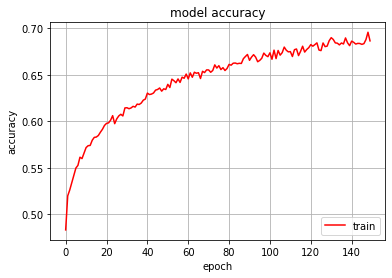

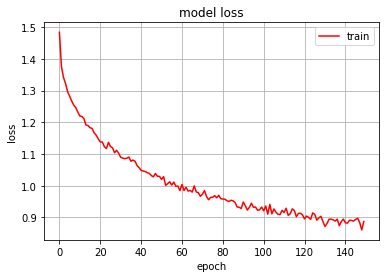

In [ ]:
# Plotting Metrics
# Plot the Accuracy Curves
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.grid()

# Plot the Loss Curves
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.grid()


In [ ]:
y_pred_16x16 = model.predict(x_test_8to32);
y_pred_16x16 = np.argmax(y_pred_16x16, axis=1);

print(classification_report(y_test,y_pred_16x16,target_names=class_names))

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

    airplane       0.59      0.68      0.63      1000
  automobile       0.66      0.80      0.72      1000
        bird       0.55      0.46      0.50      1000
         cat       0.44      0.36      0.40      1000
        deer       0.59      0.48      0.53      1000
         dog       0.53      0.38      0.44      1000
        frog       0.56      0.74      0.64      1000
       horse       0.68      0.63      0.65      1000
        ship       0.68      0.67      0.68      1000
       truck       0.56      0.66      0.60      1000

    accuracy                           0.59     10000
   macro avg       0.58      0.59      0.58     10000
weighted avg       0.58      0.59      0.58     10000

